<a href="https://colab.research.google.com/github/Obreintelly/Nairobi_Hospital_Hypothyroid_Model/blob/main/Nairobi_Hospital_Hypothyroidism_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction and Overview**

**a) Research Question**

In this study, we will be analyzing Hypothyrodism data with a view to building a model that determines whether given a patient's symptoms, they have hypothyroid


**b) Defining the Success Metric**

The success metric for this research will be a classifier model with the highest accuracy level

**c) Understanding the Context**

Nairobi Hospital is a premier institution providing top class health care services in Kenya. As a health institution, understanding disease patterns and trends is key in providing targeted, expeditious and effective treatment. This prediction model would go a long way in meeting this important goal for Nairobi Hospotal. 

**d) Experimetal Design**


a) Data Cleaning/Preparation

b) Exploratory Data Analysis

c) Building the Models

d)Conclusions


**e) Data Report**

More details are captured in the attached data report: https://drive.google.com/file/d/1s-qhcn1_6ZU51h3_ynTtVQKRl0p8wB5e/view?usp=sharing

# **2. Importing Libraries/ Loading Dataset**

In [131]:
#Importing Pandas library
import pandas as pd

#Importing Numpy Library
import numpy as np

#Importing Matplotlib Library

import matplotlib.pyplot as plt

#Importing Seaborn Library

import seaborn as sns

sns.set_theme()

#sns.set_palette('bright')


#Importing Scipy
import scipy
#Importing SKLearn
import sklearn

import warnings
warnings.filterwarnings("ignore")

# Loading Our Dataset

In [132]:
#Loading Our Dataset and assigning it as df
df = pd.read_csv('/content/hypothyroid.csv')


# Previewing Our Dataset

In [133]:
#Displaying the first 5 rows of our dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57,y,1.28,y,44,n,?


In [134]:
#Displaying the last five rows in our dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.8,y,139,y,0.97,y,143,n,?


In [135]:
# Checking size of Our Dataset
print('Our Dataset has: {} Rows, {} Columns'.format(*df.shape))


Our Dataset has: 3163 Rows, 26 Columns


In [136]:
#Exploring Our columns further, checking for missing values and 
#the datatypes in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

# **3. Data Cleaning**

In this section, before embarking on data analysis, we will first ensure that our data complies with the following Data Science Principles:


Validity

Accuracy

Consistency

Completeness

Uniformity



# **Accuracy/Validity**

In [137]:
#What unique values do we have in Our dataset?
df.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

# **Columns Validation**

Our columns description have been validated from the following sources:

1. https://www.gerties.org/conditions/thyroid-disease/
2.https://www.piedmont.org/living-better/the-difference-between-hypothyroidism-and-hyperthyroidism 
3. https://www.healthline.com/health/serum-tbg-level

In [138]:
#Age - Ageof Patient
#Sex - Sex of Patient
#on_thyroxine - whether one is on thyroxine or not
#query_on_thyroxine
#on_antithyroid_medicationthyroid_surgery
#query_hypothyroid - Whether or not patient had hypothyroid symptoms
#Hypothyroidism causes symptoms like slowed metabolism, tiredness, and weight gain. 
#Having an underactive thyroid can decrease or slow down your bodily functions

#query_hyperthyroid - Whether or not patient had hyperthyroid.Hyperthyroidism, 
#cause more energy, as opposed to less.One may experience weight loss as opposed to weight gain

#pregnant
#sick
#tumor
#lithium- Checking whether there were traces of Lithium or not. 
#Lithium use is associated with an increased risk of hypothyroidism
#goitre - Abnormal enlargement of thyroid glands
#TSH_measured - Whether TSH levels have been measured or not
#TSH -Levels ofthyroid stimulating hormone (TSH) circulating in the blood
#T3_measured - Whether T3 was measured or not
#T3 -For thyroxine to be active it is converted to triiodothyronine or T3. Blood levels of T3 is useful in evaluating for hyperthyroidism
#TT4_measured - Whether T4 was measured
#TT4 - Blood levels of freely circulating Thyroxine, or free T4 will be found to be low in hypothyroidism
#FTI - A low TSH and low FT4 or FTI indicates hypothyroidism due to a problem involving the pituitary gland
#TBG - Thyroxine-Binding Globulin- Serum TBG measurement in blood enables
#doctors detect thyroid problems

In [139]:
#Exploring the Unique values further

#Status


df.status.unique()

array(['hypothyroid', 'negative'], dtype=object)

In [140]:
#We have an expected(?) value in Our sex Column
df.sex.unique()

array(['M', 'F', '?'], dtype=object)

In [141]:
#We have 73 rows where the sex is not known.
#
df[df['sex']=='?']

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
59,hypothyroid,?,?,f,f,f,f,f,f,f,f,f,f,f,y,24,y,0.6,y,21,y,0.97,y,22,n,?
143,hypothyroid,?,?,f,f,f,f,f,f,f,f,f,f,f,y,7.5,y,1.2,y,37,y,1.06,y,35,n,?
177,negative,?,?,f,f,f,f,f,f,f,f,f,f,f,y,1.5,y,1.7,y,75,y,0.84,y,89,n,?
179,negative,?,?,f,f,f,f,f,f,f,f,f,f,f,n,?,n,?,y,260,y,0.31,y,839,n,?
279,negative,56,?,t,f,f,f,f,f,f,f,f,f,f,y,0,n,?,y,178,y,1.11,y,161,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3062,negative,?,?,f,f,f,f,f,f,f,f,f,f,f,y,9.6,y,4.8,y,168,y,0.28,y,612,n,?
3091,negative,?,?,f,f,f,f,f,f,f,f,f,f,f,n,?,n,?,y,175,y,0.86,y,204,n,?
3095,negative,?,?,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1,y,83,y,0.73,y,115,n,?
3100,negative,?,?,f,f,f,f,f,f,f,f,f,f,f,y,8.2,y,3.8,y,124,y,0.29,y,428,n,?


In [142]:
#We expect False and True
df.on_thyroxine.unique()

array(['f', 't'], dtype=object)

In [143]:
#We expect False and True entries
df.query_on_thyroxine.unique()

array(['f', 't'], dtype=object)

In [144]:
#We expect True and False entries
df.on_antithyroid_medication.unique()

array(['f', 't'], dtype=object)

In [145]:
#We have (?) entries that will have to be dealt with
df.T3.unique()

array(['0.6', '1.7', '0.2', '0.4', '1.2', '1.1', '1.3', '1.9', '?', '0.8',
       '2.2', '1.5', '2.7', '2', '0.3', '2.1', '0.5', '0.7', '1', '1.4',
       '2.3', '2.4', '0.9', '1.8', '0', '2.8', '1.6', '6.7', '3.3', '3',
       '2.5', '2.6', '4', '9.8', '3.9', '3.4', '3.8', '4.5', '3.2', '3.7',
       '4.3', '2.9', '3.1', '3.5', '3.6', '6.6', '4.9', '8.9', '4.1', '5',
       '5.3', '7.6', '7.3', '4.2', '4.4', '5.1', '7', '0.1', '0.05',
       '4.7', '6.2', '5.5', '4.6', '6.1', '8.1', '5.2', '5.6', '4.8',
       '10.2', '8.6'], dtype=object)

In [146]:
#We have (?) entries that will have to be dealt with
df.TSH.unique()

array(['30', '145', '0', '430', '7.3', '138', '7.7', '21', '92', '48',
       '36', '15', '15.3', '25', '61', '28', '170', '54', '216', '56',
       '71', '46', '70', '34', '53', '9.4', '126', '10', '530', '35',
       '65', '57', '125', '23', '80', '117', '49', '66', '8.2', '150',
       '?', '18', '165', '164', '24', '90', '77', '19', '58', '100',
       '213', '17', '235', '153', '13', '31', '109', '260', '43', '12',
       '11', '55', '6.5', '20', '7.5', '14', '60', '140', '33', '8.7',
       '0.25', '10.7', '82', '45', '42', '41', '160', '16', '89', '44',
       '176', '6.4', '183', '29', '37', '39', '7.9', '59', '68', '38',
       '47', '143', '6.6', '288', '96', '0.5', '1.2', '1.9', '0.09',
       '3.1', '0.4', '0.85', '0.3', '0.9', '1.5', '4.6', '0.2', '5.8',
       '4', '1.4', '2', '2.6', '2.9', '0.8', '4.9', '10.3', '2.3', '0.7',
       '0.6', '1.3', '2.5', '5.1', '1.7', '2.7', '22', '8.1', '3.3', '5',
       '3.2', '1.8', '1.1', '0.46', '1', '5.6', '4.4', '16.5', '2.1',
    

In [147]:
#THis column is as expected
df.TT4.unique()

array(['15', '19', '4', '6', '57', '27', '54', '34', '39', '7.6', '53',
       '38', '98', '44', '37', '81', '13', '17', '12', '50', '23', '14',
       '3.9', '52', '32', '30', '84', '10', '55', '24', '28', '11', '6.6',
       '31', '33', '41', '9', '78', '42', '8.1', '65', '16', '9.7', '46',
       '22', '61', '2.3', '21', '7.5', '18', '66', '25', '43', '2', '3',
       '58', '59', '71', '74', '56', '40', '20', '48', '230', '70', '4.1',
       '63', '5.3', '2.9', '62', '75', '68', '45', '47', '36', '80',
       '109', '8.6', '83', '82', '101', '76', '103', '112', '206', '110',
       '93', '79', '121', '?', '107', '88', '187', '254', '115', '113',
       '260', '117', '164', '97', '64', '129', '111', '106', '95', '87',
       '105', '90', '67', '134', '35', '193', '143', '130', '108', '86',
       '96', '92', '99', '216', '152', '125', '138', '194', '91', '120',
       '102', '170', '126', '116', '140', '94', '159', '85', '210', '89',
       '151', '247', '139', '153', '178', '123', '

In [148]:
#We have (?) entries that will have to be dealt with
df.T4U.unique()

array(['1.48', '1.13', '1', '1.04', '1.28', '1.19', '0.86', '1.05',
       '1.21', '1.02', '0.92', '1.29', '0.98', '1.08', '1.01', '1.18',
       '1.1', '1.27', '0.83', '1.11', '0.78', '1.39', '1.12', '0.93',
       '0.99', '0.9', '1.06', '0.68', '0.67', '1.14', '0.8', '0.96',
       '0.95', '1.46', '1.03', '0.97', '0.94', '1.09', '1.24', '1.23',
       '1.53', '1.26', '1.4', '1.17', '0.87', '0.61', '0.7', '1.07',
       '1.73', '1.45', '1.2', '0.89', '0.84', '0.91', '0.85', '1.35',
       '0.82', '1.5', '0.74', '1.71', '1.79', '0.73', '0.77', '1.25', '?',
       '0.88', '0.72', '0.31', '0', '0.79', '0.81', '0.71', '1.93',
       '1.32', '0.66', '1.68', '1.42', '1.7', '1.83', '1.41', '1.34',
       '1.65', '1.22', '0.75', '1.74', '0.69', '1.51', '0.76', '1.16',
       '0.35', '0.62', '0.54', '1.36', '1.33', '1.3', '0.48', '1.59',
       '1.75', '1.86', '1.38', '1.43', '1.62', '2.01', '0.3', '1.31',
       '1.15', '1.57', '0.55', '1.66', '0.52', '1.97', '1.47', '0.36',
       '1.88', '1

In [149]:
#We have (?) entries that will have to be dealt with
df.FTI.unique()

array(['10', '17', '0', '6', '44', '23', '63', '32', '7.5', '61', '41',
       '76', '45', '34', '81', '11', '16', '46', '22', '12', '5', '47',
       '29', '37', '60', '8.4', '8.5', '24', '28', '7', '49', '36', '15',
       '9', '80', '53', '7.2', '68', '6.6', '48', '21', '14', '2', '20',
       '1.4', '56', '3', '51', '13', '43', '78', '52', '64', '26', '35',
       '31', '133', '3.4', '54', '8.9', '57', '5.5', '58', '55', '2.8',
       '66', '4', '40', '50', '8.7', '87', '89', '112', '123', '99', '92',
       '104', '69', '196', '107', '106', '74', '97', '?', '122', '84',
       '114', '124', '241', '119', '120', '136', '85', '127', '839',
       '137', '197', '96', '77', '108', '82', '72', '94', '91', '240',
       '121', '109', '79', '100', '98', '73', '117', '165', '103', '88',
       '101', '126', '132', '128', '143', '152', '141', '186', '113',
       '102', '125', '93', '105', '159', '188', '71', '149', '116', '83',
       '176', '161', '86', '140', '111', '158', '115', '171',

In [150]:
#We have missing entries in the TBG column
df.TBG.unique()

array(['?', '28', '34', '0', '19', '30', '25', '48', '39', '31', '16',
       '21', '37', '40', '27', '3.1', '38', '108', '20', '36', '17', '23',
       '35', '32', '63', '9.3', '15', '26', '33', '41', '110', '22', '43',
       '53', '80', '47', '29', '13', '24', '18', '45', '86', '50', '8.4',
       '52', '11', '12', '14', '65', '7.3', '8.5', '69', '122'],
      dtype=object)

# Consistency

In [151]:
#We will denote all non-valid entries as missing entries and then checlk for the 
#missing values in our dataset
df.replace('?', np.nan, inplace=True)

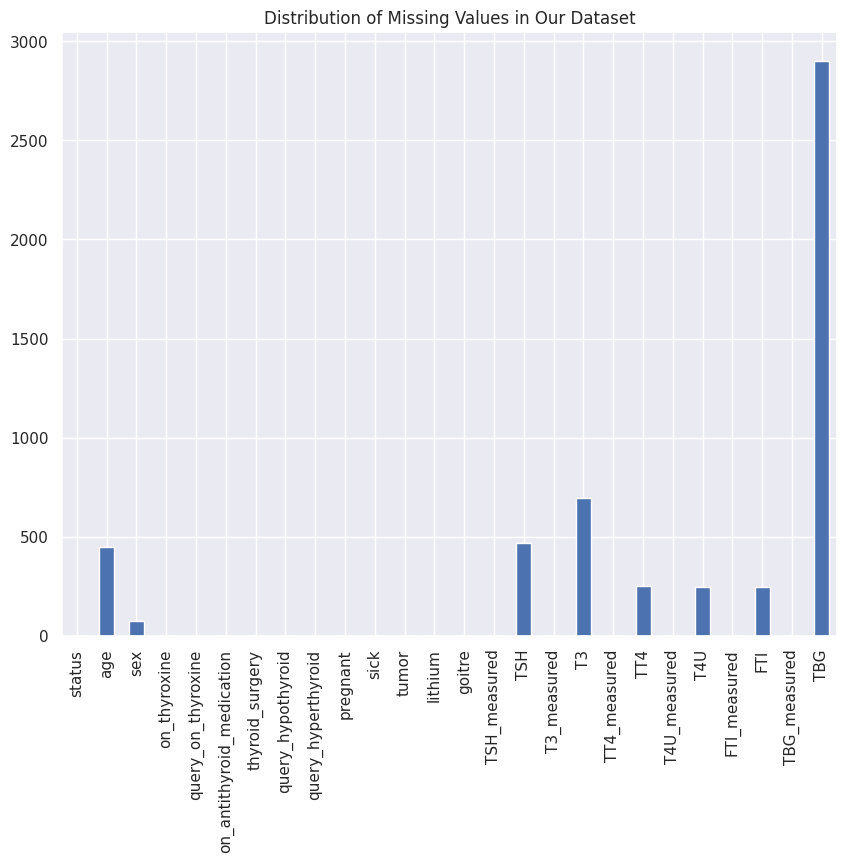

In [152]:
#Checking for missing values
plt.figure(figsize=(10, 8), dpi=100)
df.isna().sum().plot(kind='bar')
plt.title('Distribution of Missing Values in Our Dataset');

In [153]:
#To make a decision on how to address the missing values in Our dataset,
#determining their percentages will be an important first step.


#Deriving percentage of missing values
100 *df.isna().sum()/len(df)

#Creating a function to help us derive the percentages

def percent_missing(df):
  percent_na = 100 *df.isna().sum()/len(df)
  percent_na = percent_na[percent_na>0].sort_values()

  return percent_na

percent_na = percent_missing(df)

percent_na

sex     2.307936
FTI     7.809042
T4U     7.840658
TT4     7.872273
age    14.100537
TSH    14.796080
T3     21.972811
TBG    91.779956
dtype: float64

In [154]:
#Although from our validation studies, TBG levels are a crucial
#determinant for Hyper/Hypothyroidism, we have too many missing
#values that it would almost impossible to come up with a 
#meaningful cure. The best decision to make at this stage is to just drop this 
#column

#We can take comfort in the fact that in any case, T3 and T4 which cling on TBG
# and determine to a large extend its values are still available in our dataset


df.drop('TBG', axis=1, inplace=True)

In [155]:
#Displaying Summary Statistics to help make a decision on how to deal with the 
#remaining missing values 
df.describe().T

,count,unique,top,freq
status,3163,2,negative,3012
age,2717,92,59,64
sex,3090,2,F,2182
on_thyroxine,3163,2,f,2702
query_on_thyroxine,3163,2,f,3108
on_antithyroid_medication,3163,2,f,3121
thyroid_surgery,3163,2,f,3059
query_hypothyroid,3163,2,f,2922
query_hyperthyroid,3163,2,f,2920
pregnant,3163,2,f,3100


# Feature Engineering

In [156]:
#To better address the Missing Values issue, we undertake a bit of feature engineering
#We convert our rows with 'f' to 0 and 't' to 1 and same for Female and Male rows
df.replace({"y":1,"n":0, "t":1, "f":0, "M":1, "F":0}, inplace=True)

In [157]:
#df.info()

In [159]:
#From the Summary Statistics above, the Female Gender is the top count
#We make the assumption that missing values will belong to this gender
df.sex.mode()

#df['sex'] = df.sex.astype(int)
df['sex'].fillna(0, inplace = True)


In [160]:
#Since the following columns are Objects, we need to convert them to either ints
#or floats in order to do any manioulation on them
df['age'] = df['age'].astype(float)
df['TSH'] = df.TSH.astype(float)
df['T3'] = df.T3.astype(float)
df['TT4'] = df.TT4.astype(float)
df['FTI'] = df.FTI.astype(float)


In [164]:
#For the following Numerical Columns, we shall fill them with mean and median values
df['age'].fillna(df['age'].mean(), inplace = True)
df['TSH'].fillna(df['TSH'].mean(), inplace = True)
df['T3'].fillna(df['T3'].median(), inplace = True)
df['TT4'].fillna(df['TT4'].median(), inplace = True)
df['FTI'].fillna(df['FTI'].median(), inplace = True)
df['T4U'].fillna(df['T4U'].median(), inplace = True)

In [165]:
#Previewing Our first 5 rows
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,hypothyroid,15.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,hypothyroid,24.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1,1,0.0,0
3,hypothyroid,24.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0
4,hypothyroid,77.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0


In [167]:
#Checking whether we still have missing values

df.isna().any().sum()

0

# Consistency

In [170]:
#We check for duplicates in Our dataset

df.duplicated().any().sum()

1

In [174]:
#Dropping the Duplicate
df = df.drop_duplicates()

In [175]:
#Confirming we do not have anymore duplicates

df.duplicated().any()

False

# **Outliers**

In [177]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3007.0,51.350030,17.864731,1.0,38.0,51.154214,64.0,98.0
sex,3007.0,0.295643,0.456407,0.0,0.0,0.000000,1.0,1.0
on_thyroxine,3007.0,0.148321,0.355477,0.0,0.0,0.000000,0.0,1.0
query_on_thyroxine,3007.0,0.018291,0.134023,0.0,0.0,0.000000,0.0,1.0
on_antithyroid_medication,3007.0,0.013967,0.117375,0.0,0.0,0.000000,0.0,1.0
thyroid_surgery,3007.0,0.034253,0.181910,0.0,0.0,0.000000,0.0,1.0
query_hypothyroid,3007.0,0.078151,0.268454,0.0,0.0,0.000000,0.0,1.0
query_hyperthyroid,3007.0,0.075491,0.264225,0.0,0.0,0.000000,0.0,1.0
pregnant,3007.0,0.020286,0.141000,0.0,0.0,0.000000,0.0,1.0
sick,3007.0,0.032258,0.176714,0.0,0.0,0.000000,0.0,1.0


# **Saving Our Dataset**

In [180]:
#Saving Our Clean Dataset
df.to_csv('hypo.csv', index=False)

# **4. Exploratory Data Analysis**

In [192]:
df= pd.read_csv('hypo.csv')

In [193]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,hypothyroid,15.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,hypothyroid,24.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0
3,hypothyroid,24.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0
4,hypothyroid,77.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0


# Univariate Analysis

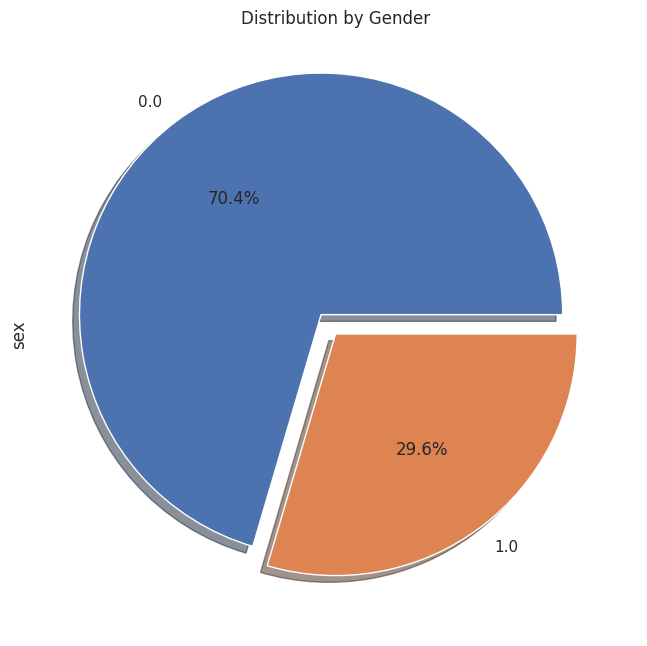

In [194]:
#Distribution of Female Vs Male in Our dataset
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.sex.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution by Gender');

In [ ]:
#0 represents Females while 1 represents male
#There were more Female patients in the study than male patients

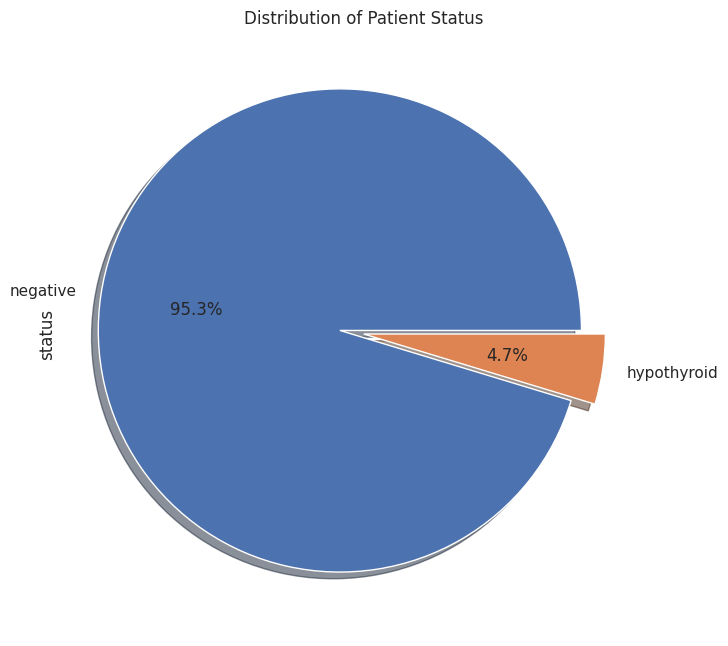

In [195]:
#Distribution of Patient Status
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.status.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Patient Status');

In [ ]:
#We have more number of patients with a negative status than those who return 
# Positive Thyroid Test

In [196]:
#Empirical Cumulative Frequency Distribution plots are a powerful way of exploring
#whether our data follows a normal distribution without succumbing to binning bias
#prevalent in the use of Histograms

# Create a function for computing and plotting the ECDF with default parameters
def plot_ecdf(data,title = "Empirical CUmulative Distribution Function Plot", xlabel = 'Data Values', ylabel = 'Percentage'):
    
    """ 
    Function to plot ecdf taking a column of data as input.
    """
    xaxis = np.sort(data)
    yaxis = np.arange(1, len(data)+1)/len(data)
    plt.plot(xaxis,yaxis,linestyle='none',marker='.')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.margins(0.02)

In [197]:
# Creating our Empirical Cumulative Frequency Distribution function
def ecdf(data):
    """ 
    This function creates the x and y axis for an ecdf
    plot given the data as input.
    """
    xaxis = np.sort(data)
    yaxis = np.arange(1,len(data)+1)/len(data)
    return xaxis, yaxis

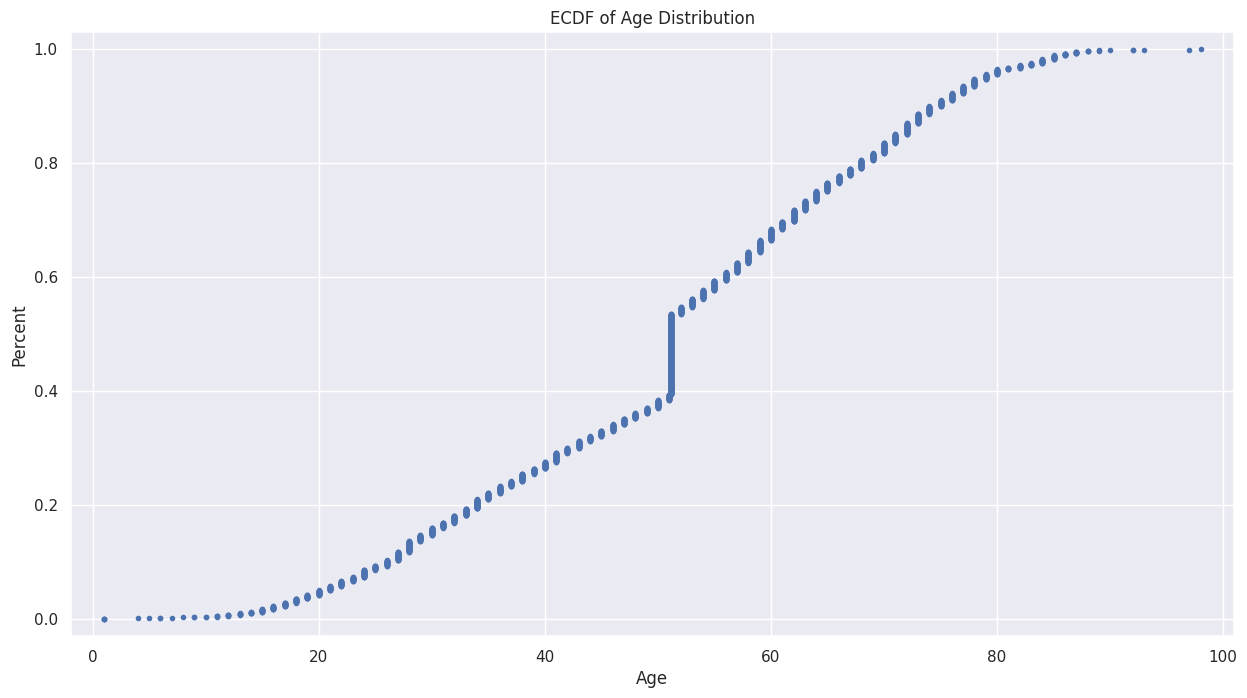

In [198]:
# Creating the xaxis and yaxis for our ecdf on age column
x,y = ecdf(df['age'])

# Plotting our ecdf
plt.figure(figsize=(15,8), dpi=100)
plt.plot(x,y,linestyle='none',marker='.')
plt.title('ECDF of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Percent')
plt.margins(0.03);

In [199]:
#The age column doesn't quite follow a normal distribution.
#We can still pick age 51 as the mean age. 

51.3500302753277

# Bivariate Analysis

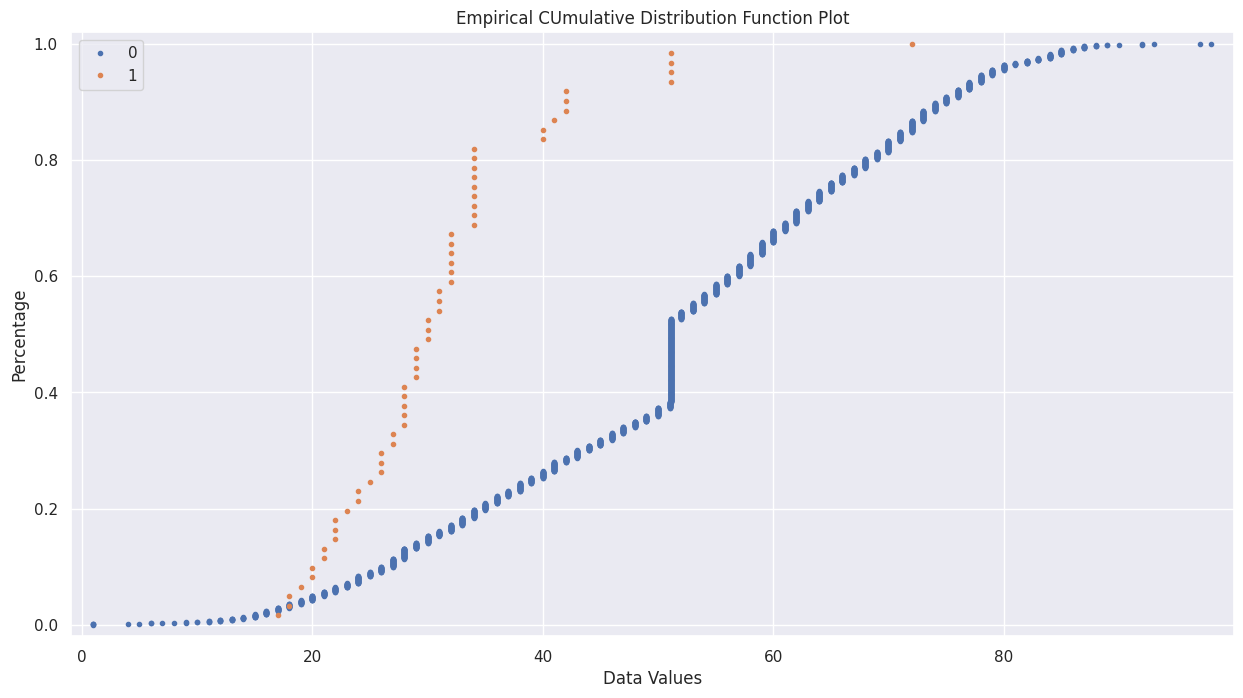

In [200]:
#ECDF of Price Vs Waterfront
pregnant= df.pregnant.unique()
plt.figure(figsize=(15,8), dpi=100)
plot_ecdf(df['age'][df.pregnant==0])
plot_ecdf(df['age'][df.pregnant==1])
plt.legend(labels=pregnant[::]);